In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import random
import numpy as np
from scipy import stats

In [3]:
tiempo = 'Tiempo de ejecución (en nanosegundos)'
n = 'n'
m = 'm'
p = 'p'
ns = 'ns'
it = 'it'
diff = 'diff'
calidad = 'Diferencia vs solución exacta'

error_rate = 'Porcentaje de error: {0:2.2f}%'

blue='#4C72B0'
green='#55A868'
red='#C44E52'

pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [4]:
greedy = pd.read_csv('accuracy-greedy.csv')
greedy = greedy.groupby([n,m,diff]).min().reset_index()
local = pd.read_csv('accuracy-local.csv')
local = local.groupby([n,m,diff]).min().reset_index()
grasp = pd.read_csv('accuracy-grasp.csv')
grasp = grasp.groupby([n,m,it,p,diff]).min().reset_index()
grasp = grasp.groupby([n,m,it,p]).max().reset_index()

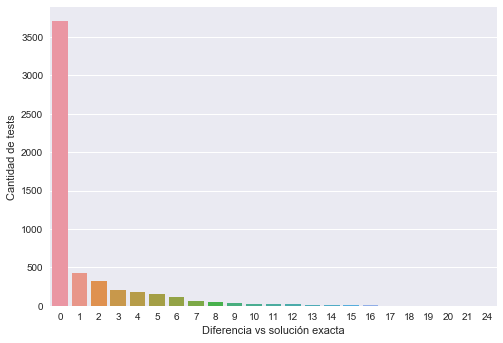

Porcentaje de error: 30.83%


,n,m,diff,ns
max,40.000,390.000,24.000,31079.000
mean,30.450,119.550,1.185,10122.036
std,7.790,92.073,2.517,6429.430


In [5]:
g = sns.countplot(x=diff, data=greedy)
g.set_xlabel(calidad)
g.set_ylabel("Cantidad de tests")
plt.show()

greedy_count = greedy.groupby([diff])[n].agg(['count']).reset_index()
greedy_sum = greedy_count['count'].agg(['sum']).get(0)

percent = (greedy_sum - greedy_count['count'][0])/greedy_sum
print(error_rate.format(percent*100))

greedy.agg(['max', 'mean', np.std])

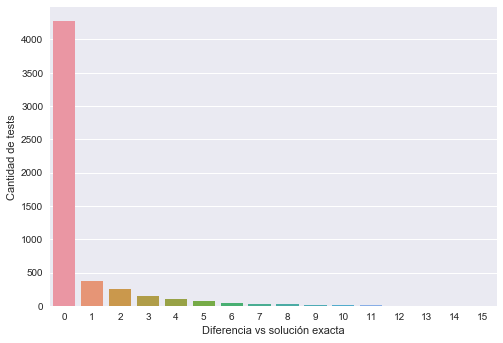

Porcentaje de error: 20.21%


,n,m,diff,ns
max,40.000,390.000,15.000,1886955.000
mean,30.450,119.550,0.587,189041.690
std,7.790,92.073,1.560,202448.425


In [6]:
g = sns.countplot(x=diff, data=local)
g.set_xlabel(calidad)
g.set_ylabel("Cantidad de tests")
plt.show()

local_count = local.groupby([diff])[n].agg(['count']).reset_index()
local_sum = local_count['count'].agg(['sum']).get(0)

percent = (local_sum - local_count['count'][0])/local_sum
print(error_rate.format(percent*100))

local.agg(['max', 'mean', np.std])

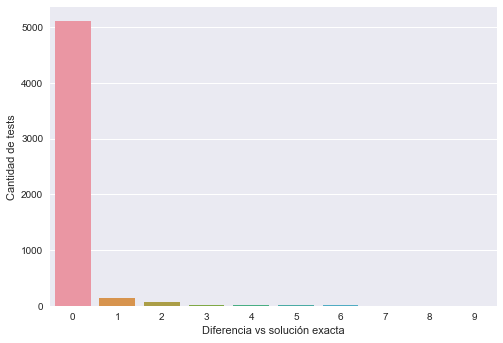

In [7]:
test = grasp[(grasp.p == 0.6) & (grasp.it == 15)]
g = sns.countplot(x=diff, data=test)
g.set_xlabel(calidad)
g.set_ylabel("Cantidad de tests")
plt.show()

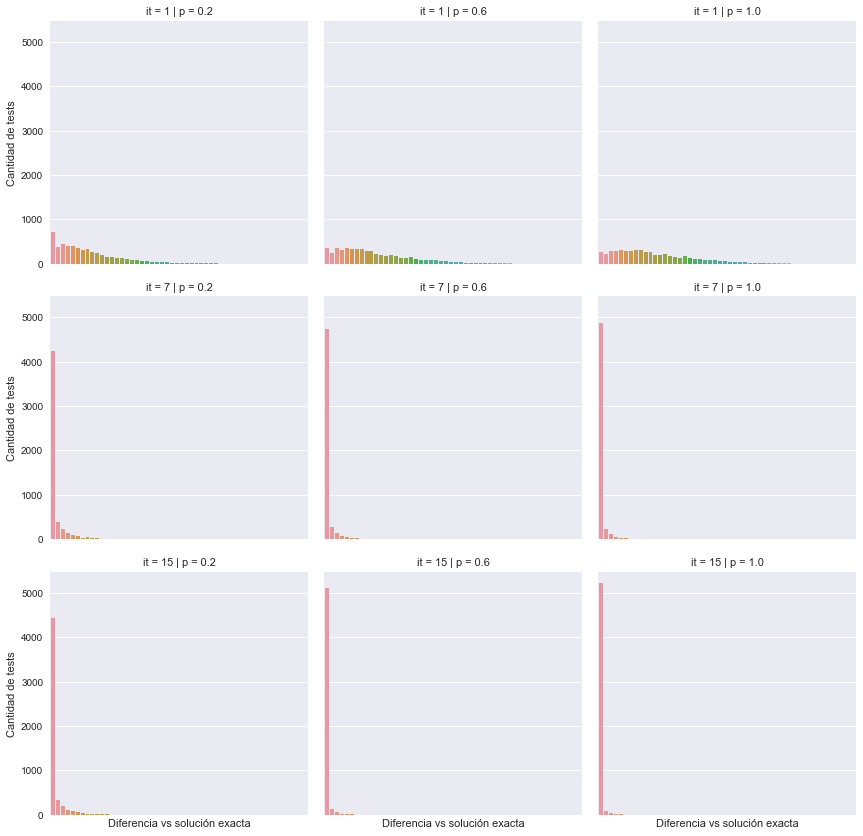

In [8]:
grasp_test = grasp[((grasp.p == 0.2) | (grasp.p == 0.6) | (grasp.p == 1))
                    & ((grasp.it == 1) | (grasp.it == 7) | (grasp.it == 15))]

g = sns.factorplot(
    x=diff, data=grasp_test,
    col=p, row=it,
    kind="count"
)

g.set(xticks=[])
g.set_axis_labels(calidad, "Cantidad de tests")
plt.show()

In [9]:
grasp_test = grasp[((grasp.p == 0.2) | (grasp.p == 0.6) | (grasp.p == 1))
                    & ((grasp.it == 1) | (grasp.it == 7) | (grasp.it == 15))]

grasp_test = grasp_test.drop(n,1).drop(m,1)
graspCopy = grasp_test.copy()
graspCopy.columns = [it,p,'dif',ns]

grasp_test = grasp_test.groupby([p,it]).agg(['max', 'mean', np.std]).reset_index()
grasp_test = grasp_test.assign(error=1)

for ps in [0.2,0.6,1]:
    for its in [1,7,15]:
        count, _ = graspCopy[(graspCopy.p == ps) & (graspCopy.it == its)].shape
        errcount, _ = graspCopy[(graspCopy.p == ps) & (graspCopy.it == its) & (graspCopy.dif > 0)].shape
        grasp_test.loc[(grasp_test.p == ps) & (grasp_test.it == its), 'error'] = errcount/count
grasp_test

p  it diff                     ns                         error
             max   mean   std       max        mean         std      
0 0.200   1   48  7.134 6.694   3305564  384638.608  414931.701 0.865
1 0.200   7   27  0.696 1.939  19667204 2351098.390 2381269.254 0.210
2 0.200  15   18  0.530 1.598  41406710 5021068.397 5101869.770 0.175
3 0.600   1   59  9.687 7.898   3357665  346049.533  365679.615 0.934
4 0.600   7   15  0.307 1.133  17384532 2339655.480 2280199.303 0.118
5 0.600  15    9  0.097 0.562  34233385 5009071.496 4885519.631 0.047
6 1.000   1   60 10.747 8.241   2743346  315578.335  333585.443 0.951
7 1.000   7   13  0.227 0.952  15183992 2350323.404 2290930.016 0.093
8 1.000  15    9  0.054 0.401  31964890 4995022.828 4836175.188 0.027

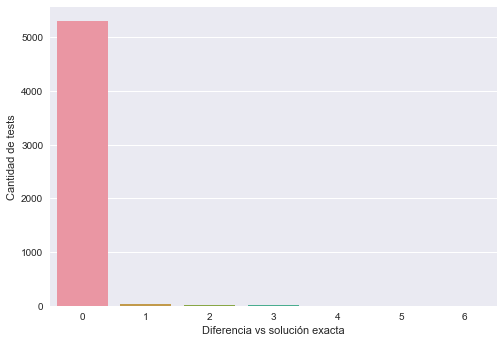

Porcentaje de error: 1.04%
56


,n,m,it,p,diff,ns
max,40.000,390.000,50.000,0.600,6.000,99235601.000
mean,30.450,119.550,50.000,0.600,0.018,15165859.114
std,7.790,92.073,0.000,0.000,0.213,14519655.846


In [13]:
grasp50 = pd.read_csv('accuracy-grasp50.csv')
grasp50 = grasp50.groupby([n,m,it,p]).min().reset_index()

g = sns.countplot(x=diff, data=grasp50)
g.set_xlabel(calidad)
g.set_ylabel("Cantidad de tests")
plt.show()

grasp_count = grasp50.groupby([diff])[n].agg(['count']).reset_index()
grasp_sum = grasp_count['count'].agg(['sum']).get(0)

percent = (grasp_sum - grasp_count['count'][0])/grasp_sum
print(error_rate.format(percent*100))
print(grasp_sum - grasp_count['count'][0])

grasp50.agg(['max', 'mean', np.std])